>## **Car price prediction using Linear Regression Model**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Cleaning / Preprossesing

In [3]:
df = df.drop(['CarName','car_ID'] , axis= 1)

In [4]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [7]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [8]:
df['doornumber'] = df['doornumber'].replace({'four':4,'two':2})

C:\Users\rabiu\AppData\Local\Temp\ipykernel_10140\1115713848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'four':4,'two':2})


In [9]:
df['doornumber'].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [10]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [11]:
df['cylindernumber'] = df['cylindernumber'].replace({'four':4, 'six':6,'five':5,'eight':8, 'two':2, 'twelve':12, 'three':3})

C:\Users\rabiu\AppData\Local\Temp\ipykernel_10140\1502683388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber'] = df['cylindernumber'].replace({'four':4, 'six':6,'five':5,'eight':8, 'two':2, 'twelve':12, 'three':3})


In [12]:
df['cylindernumber'].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [14]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

### Data Preprossesing

In [29]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

In [16]:
df = pd.get_dummies(df,columns=['fueltype','aspiration','carbody', 'drivewheel', 'enginelocation', 'wheelbase','fuelsystem','enginetype'], drop_first=True)

In [30]:
## defining X and y
X = df.drop('price' , axis=1)
y = df['price']

In [31]:
## splitting the datasets into train and test subset for model training and model testing purpose
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
## scaling the data in same scale for better accuracy
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [33]:
## building model
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(regression , X_train , y_train , scoring='neg_mean_squared_error',cv=10)
cv = np.mean(cv)
print(cv)

-9033786.142429141


In [37]:
## model prediction
y_pred = regression.predict(X_test)
y_pred

array([24548.46728128, 14945.70290413,  8239.48588557, 13483.60935228,
       37689.03579779,  7662.77002037,  8623.98780056,  7691.56635309,
       18603.44437764,  7543.41730086, 12636.10503243,  8907.01528571,
       19233.21113752, 10328.74239126, 28769.1378732 ,  6454.85744846,
       -2945.77731139, 13776.42945352,  8550.70228564,  9902.84921922,
       10423.89618537, 14772.43765341,  5876.38617582,  6920.44495341,
        6836.41686213, 26521.41065204,  8882.7638858 , 16697.87531244,
        7318.78762831, 15795.95766143, 35806.76280122,  6579.85260508,
        -758.42236068, 16135.43622294,  9706.48828972, 25040.63623121,
       13052.87507965, 12715.92554158,  7907.56810627, 14857.46698007,
       15876.28813025])

In [24]:
from sklearn.metrics import r2_score , mean_squared_error 

In [25]:
accuracy = r2_score(y_test , y_pred)
accuracy

0.6962867226036342

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse

23976347.31220797

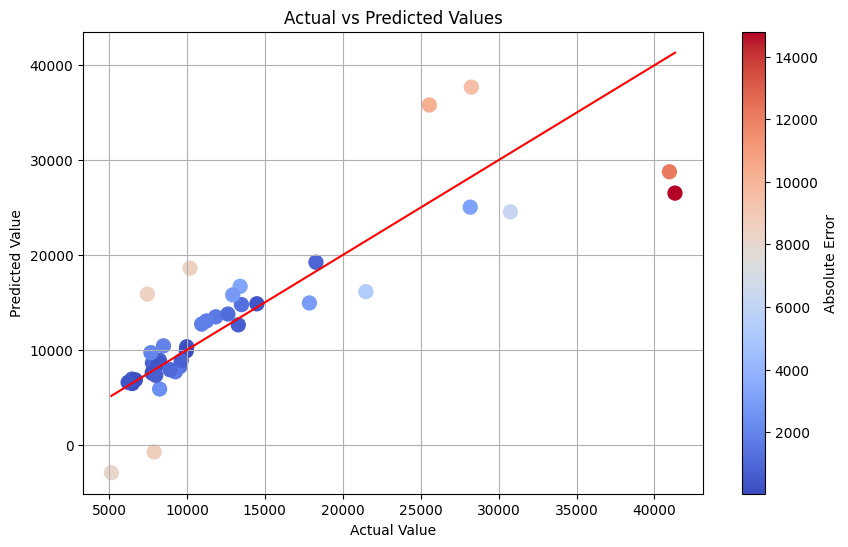

In [50]:
## visualizing the model prediction vs actual ponits
import matplotlib.pyplot as plt
errors = np.abs(y_test - y_pred) ## caculating abs error
plt.figure(figsize=(10,6))
plt.scatter(x=y_test , y=y_pred,cmap='coolwarm',c=errors, s=100)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red')
plt.colorbar(label='Absolute Error')
plt.grid(True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='price', ylabel='Count'>

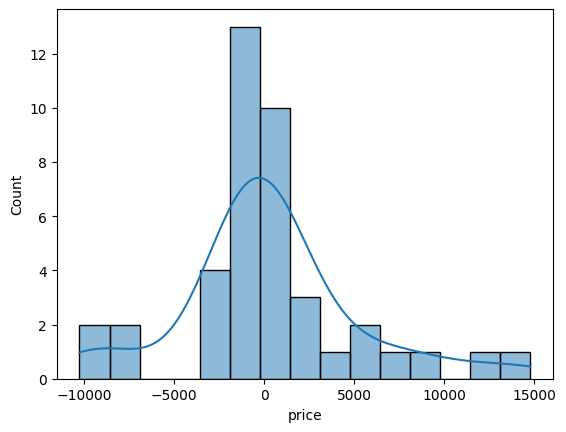

In [28]:
import seaborn as sns
residule = y_test - y_pred
sns.histplot(residule,kde=True)